## Simulate binned magnitudes

This simplifies the simulating: the magnitudes are correctly sampled and binned and can be generated with either beta or b-value

In [12]:
from functions.general_functions import simulated_magnitudes_binned
from seismostats import plot_cum_fmd

<Axes: xlabel='Magnitude', ylabel='N'>

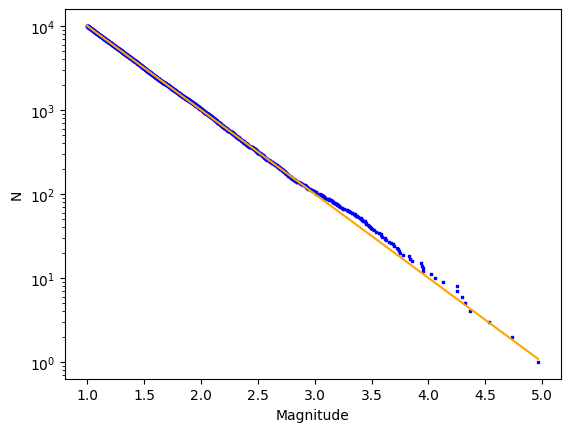

In [13]:
n= 10000
b = 1
mc = 1
delta_m = 0.001
b_parameter = 'b_value'
mags = simulated_magnitudes_binned(n, b, mc, delta_m, b_parameter=b_parameter)

# show in plot
plot_cum_fmd(mags, b_value=b, color=['blue','orange'])

## Autocorrelation

Let us verify that the autocorrelation of lag one functions properly and that Morans function for the expectation value is correct

In [14]:
from functions.general_functions import acf_lag_n
import matplotlib.pyplot as plt
import numpy as np

In [15]:
idxs = np.arange(2, 100)
acf = np.zeros(len(idxs))
acf_std = np.zeros(len(idxs))
for ii, idx in enumerate(idxs):
    acf_loop = np.zeros(1000)
    for jj in range(1000):
        a = np.random.rand(idx)
        # estimte autocorrelation
        acf_loop[jj] = acf_lag_n(a, 1)
    acf[ii] = np.mean(acf_loop)
    acf_std[ii] = np.std(acf_loop)
    

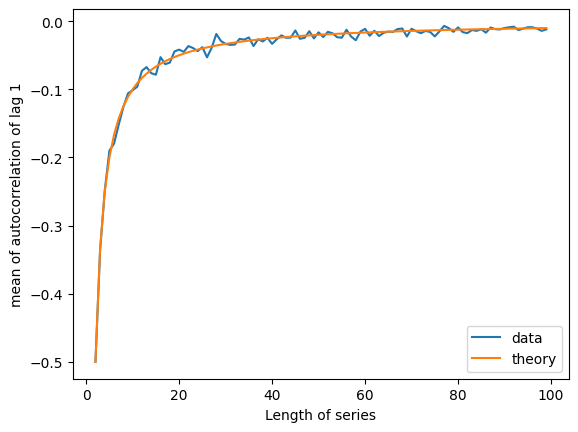

In [16]:
plt.plot(idxs, acf, label='data')
plt.plot(idxs, -1/idxs, label ='theory')

plt.xlabel('Length of series')
plt.ylabel('mean of autocorrelation of lag 1')
plt.legend()

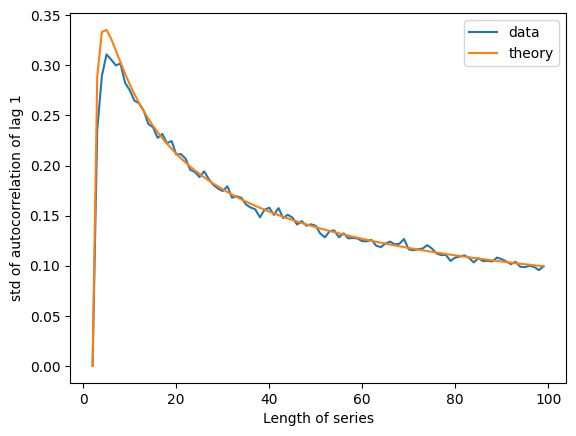

In [17]:
std_th = (idxs-2) / ((idxs-1) * np.sqrt(idxs))

plt.plot(idxs, acf_std, label='data')
plt.plot(idxs, std_th, label ='theory')


plt.xlabel('Length of series')
plt.ylabel('std of autocorrelation of lag 1')
plt.legend()

## Single Utsu test

The Utsu test tests if two populations of magnitudes orininate from the same underlying distribution

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from functions.general_functions import utsu_test, simulated_magnitudes_binned
from seismostats import estimate_b


In [19]:
b1 = 1
b2 = 1.2
n1=100
n2=100

mc = 0
delta_m=0.1
b_parameter='b_value'

mags1 = simulated_magnitudes_binned(n1, b1, mc, delta_m, b_parameter=b_parameter)
mags2 = simulated_magnitudes_binned(n2, b2, mc, delta_m, b_parameter=b_parameter)
b_est1 = estimate_b(mags1, mc, delta_m, b_parameter='beta')
b_est2 = estimate_b(mags2, mc, delta_m, b_parameter='beta')

p = utsu_test(b_est1, b_est2, n1, n2)

print('Utsu test: p = ', p)

Utsu test: p =  0.06018915213860797


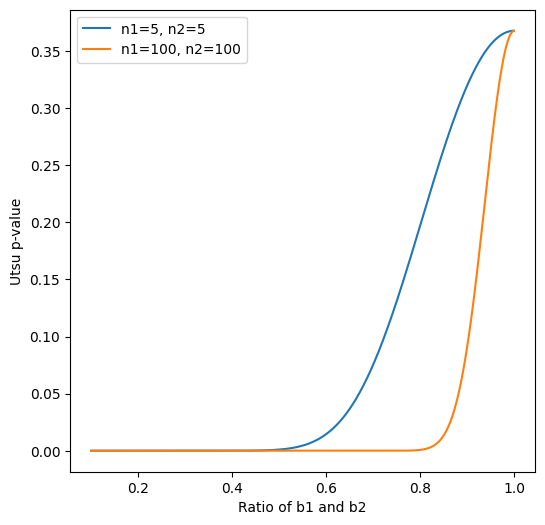

In [20]:
n1= 50 
n2= 50 
ratios = np.arange(0.1, 1, 0.001)
p = np.zeros(len(ratios))
for ii, ratio in enumerate(ratios):
    b1 = 1
    b2 = b1 / ratio
    p[ii] = utsu_test(b1, b2, n1, n2)


n1= 500 
n2= 500 
p2 = np.zeros(len(ratios))
for ii, ratio in enumerate(ratios):
    b1 = 1
    b2 = b1 / ratio
    p2[ii] = utsu_test(b1, b2, n1, n2)

# plot 
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(ratios, p, label='n1=5, n2=5')
ax.plot(ratios, p2, label='n1=100, n2=100')
ax.set_xlabel('Ratio of b1 and b2')
ax.set_ylabel('Utsu p-value')
ax.legend()

## Simulate different b-value variations and plot b-values with running window

This exists purely for plotting purposes

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from functions.general_functions import simulate_rectangular, simulate_step, simulate_sinus, simulate_randomfield, simulate_ramp, b_any_series

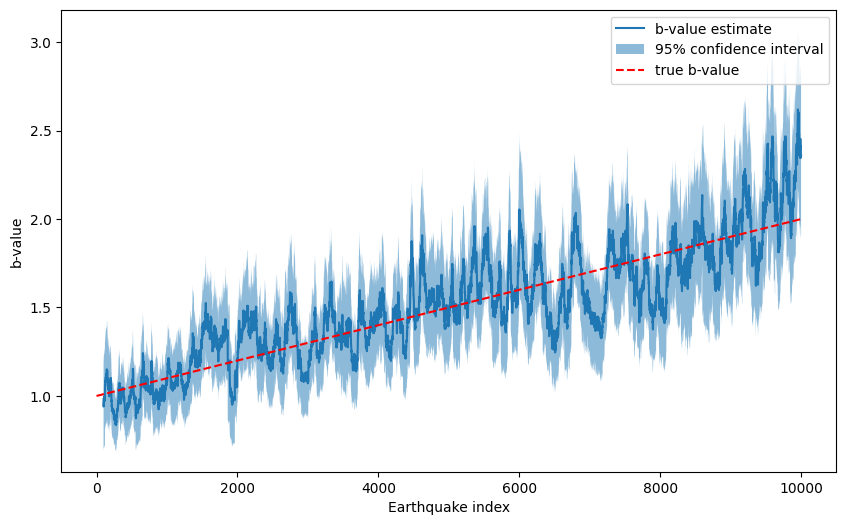

In [22]:
n = 10000
b = 1
delta_b = 1
mc = 0
delta_m = 0.1

mags, b_true = simulate_ramp(n, b, delta_b, mc, delta_m)


# Plot
dates = np.arange(len(mags))
b_time, idx_max, b_std = b_any_series(mags, dates, n_b = 100, mc=mc, delta_m=delta_m, return_std=True, overlap=1, method='tinti')

# plot nicely
ax = plt.subplots(figsize=(10,6))[1]
ax.plot(dates[idx_max], b_time, label='b-value estimate')
ax.fill_between(dates[idx_max], b_time-1.96*b_std, b_time+1.96*b_std, alpha=0.5, label='95% confidence interval')
ax.plot(dates, b_true, color='red', linestyle='--', label='true b-value')
ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')
ax.legend()

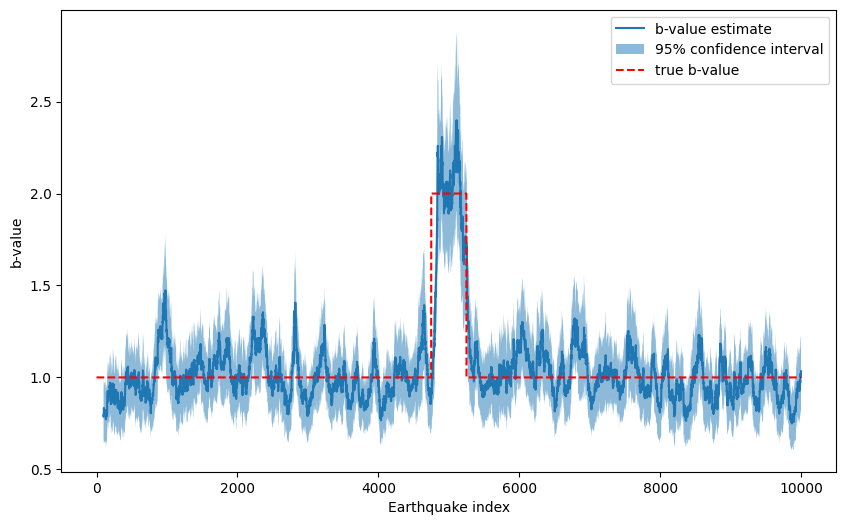

In [23]:
n = 10000
n_anomal = 500
b = 1
delta_b = 1
mc = 0
delta_m = 0.1

mags, b_true = simulate_rectangular(n, n_anomal, b, delta_b, mc, delta_m)


# Plot
dates = np.arange(len(mags))
b_time, idx_max, b_std = b_any_series(mags, dates, n_b = 100, mc=mc, delta_m=delta_m, return_std=True, overlap=1, method='tinti')

# plot nicely
ax = plt.subplots(figsize=(10,6))[1]
ax.plot(dates[idx_max], b_time, label='b-value estimate')
ax.fill_between(dates[idx_max], b_time-1.96*b_std, b_time+1.96*b_std, alpha=0.5, label='95% confidence interval')
ax.plot(dates, b_true, color='red', linestyle='--', label='true b-value')
ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')
ax.legend()

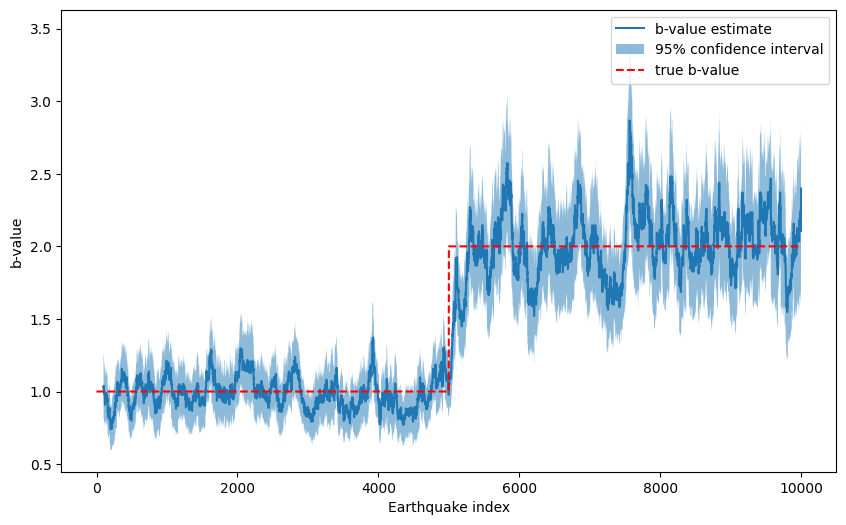

In [24]:
n = 10000
b = 1
delta_b = 1
mc = 0
delta_m = 0.1

mags, b_true = simulate_step(n, b, delta_b, mc, delta_m, idx_step=5000)


dates = np.arange(len(mags))
b_time, idx_max, b_std = b_any_series(mags, dates, n_b = 100, mc=mc, delta_m=delta_m, return_std=True, overlap=1, method='tinti')

# plot nicely
ax = plt.subplots(figsize=(10,6))[1]
ax.plot(dates[idx_max], b_time, label='b-value estimate')
ax.fill_between(dates[idx_max], b_time-1.96*b_std, b_time+1.96*b_std, alpha=0.5, label='95% confidence interval')
ax.plot(dates, b_true, color='red', linestyle='--', label='true b-value')
ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')
ax.legend()

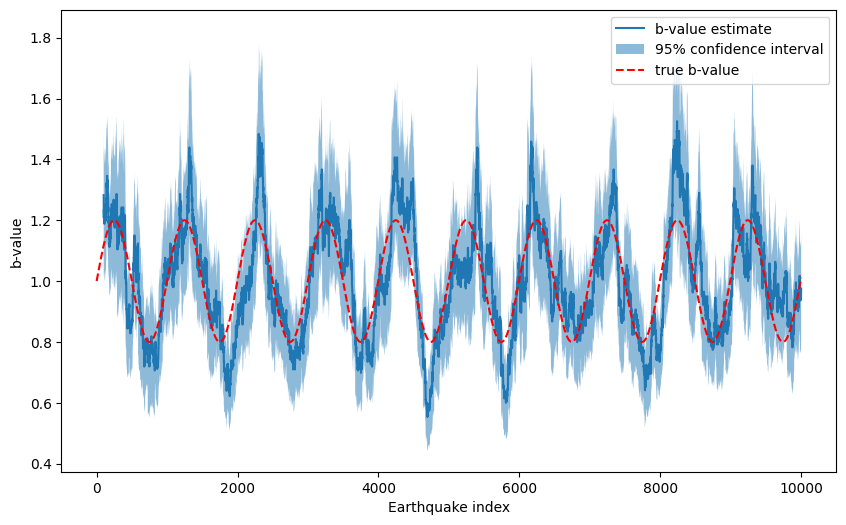

In [25]:
n = 10000
n_wavelength = 1000
b = 1
delta_b = 0.2
mc = 0
delta_m = 0.1

mags, b_true = simulate_sinus(n, n_wavelength, b, delta_b, mc, delta_m)


dates = np.arange(len(mags))
b_time, idx_max, b_std = b_any_series(mags, dates, n_b = 100, mc=mc, delta_m=delta_m, return_std=True, overlap=1, method='tinti')

# plot nicely
ax = plt.subplots(figsize=(10,6))[1]
ax.plot(dates[idx_max], b_time, label='b-value estimate')
ax.fill_between(dates[idx_max], b_time-1.96*b_std, b_time+1.96*b_std, alpha=0.5, label='95% confidence interval')
ax.plot(dates, b_true, color='red', linestyle='--', label='true b-value')
ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')
ax.legend()

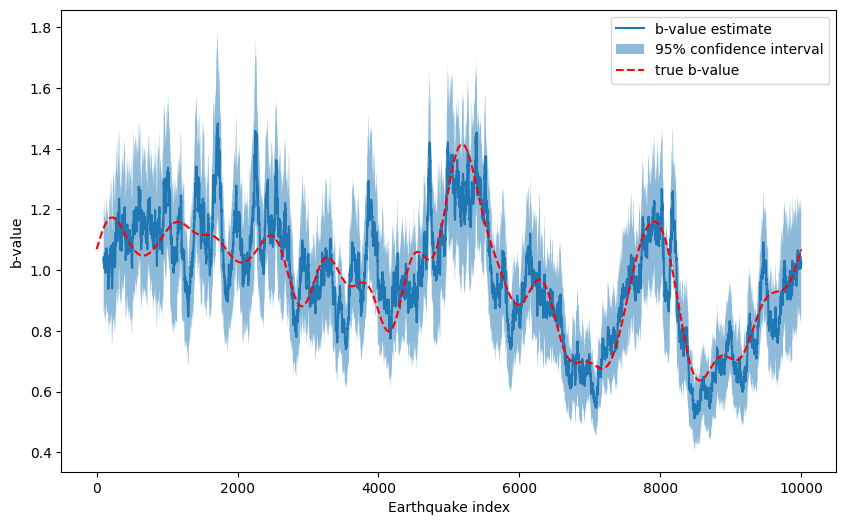

In [26]:
n = 10000
kernel_width = 500
b = 1
delta_b = 0.2
mc = 0
delta_m = 0.1

mags, b_true = simulate_randomfield(n, kernel_width, b, delta_b, mc, delta_m)


dates = np.arange(len(mags))
b_time, idx_max, b_std = b_any_series(mags, dates, n_b = 100, mc=mc, delta_m=delta_m, return_std=True, overlap=1, method='tinti')

# plot nicely
ax = plt.subplots(figsize=(10,6))[1]
ax.plot(dates[idx_max], b_time, label='b-value estimate')
ax.fill_between(dates[idx_max], b_time-1.96*b_std, b_time+1.96*b_std, alpha=0.5, label='95% confidence interval')
ax.plot(dates, b_true, color='red', linestyle='--', label='true b-value')
ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')
ax.legend()

## Different cutting methods

A time series can be cut with a constant number of events or randomly

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from functions.core_functions import cut_random_idx, cut_constant_idx, cut_random

In [28]:
times = [10,20,30,40,50,51,52,53,54,55,56,57, 58,59,60,61,62,63,64,65,66,67, 68,69,70,80,90,100, 110, 120, 130, 140, 150, 160, 170,171, 172,173,174,175,176,177,178,179, 180, 190, 200, 300,400,500]

a = np.random.rand(len(times))

n_b = 8
offset = 0

idx_const, c_chunks = cut_constant_idx(a, len(a)/n_b, offset=0)
idx_rand, r_chunks = cut_random_idx(a, int(len(a)/n_b))
idx_time, t_chunks = cut_random(a, int(len(a)/n_b), times)

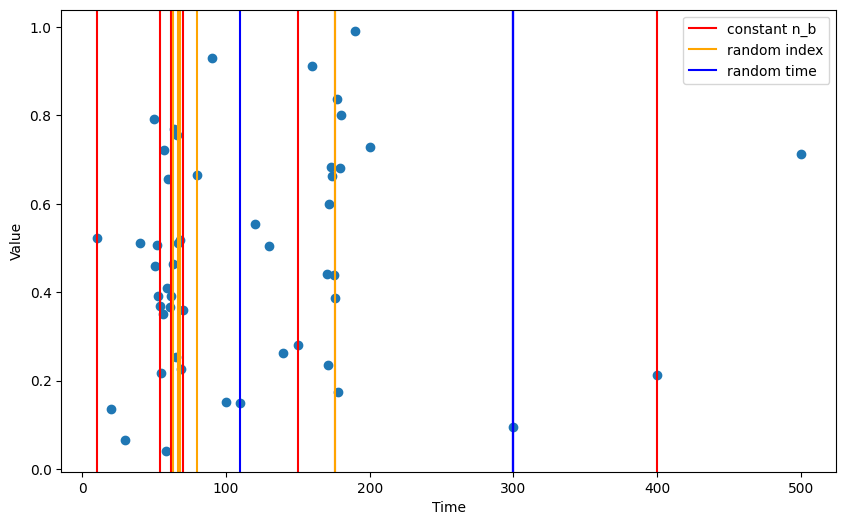

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(times, a, 'o')

# plot vertical lines at the cut points
cnt = 0
for ii in idx_const:
    if cnt == 0:
        ax.axvline(times[ii], color='red', label='constant n_b')
        cnt += 1
    else:
        ax.axvline(times[ii], color='red')

for ii in idx_rand:
    if cnt == 1:
        ax.axvline(times[ii], color='orange', label='random index')
        cnt += 1
    else:
        ax.axvline(times[ii], color='orange')

for ii in idx_time:
    if cnt == 2:
        ax.axvline(times[ii], color='blue', label='random time')
        cnt += 1
    else:
        ax.axvline(times[ii], color='blue')

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc='upper right')

The lines show where the cuts are chosen. They cut will be performed riht before the value that the line is on, so that that value will be the first element of the subsample

## b_samples and b_samples_pos

These functions cut a magnitude series with the methods shown above, and then estimate the b-value for each sample 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from functions.core_functions import b_samples, b_samples_pos
from functions.general_functions import simulate_rectangular

Text(0, 0.5, 'Number of earthquakes')

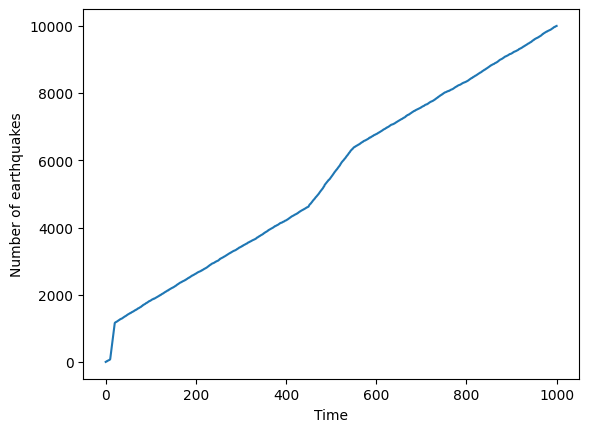

In [31]:
n = 10000
n_anomal = 1000
b = 1
delta_b = 1
mc = 0
delta_m = 0.1

mags, b_true = simulate_rectangular(n, n_anomal, b, delta_b, mc, delta_m)
times = np.random.rand(len(mags)-2000)*1000
times_temp = 500 + (np.random.rand(1000)-0.5)*100
times_temp2 = 10+ np.random.rand(1000)*10
times = np.concatenate((times, times_temp, times_temp2))
times = np.sort(times)

plt.plot(times, np.arange(len(times)))
#label
plt.xlabel('Time')
plt.ylabel('Number of earthquakes')

In [44]:
b_series, n_bs, idx = b_samples(mags,100, mc=mc, delta_m=delta_m, cutting='random_idx', return_idx=True, nb_min=2)
idx = idx[1:]-1

Text(0, 0.5, 'b-value')

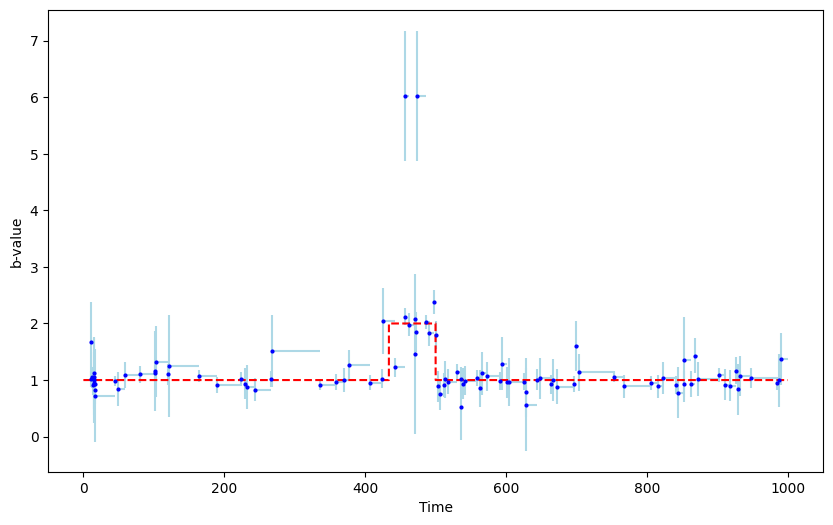

In [45]:
# plot with error bars
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.errorbar(
    times[idx],
    b_series,
    xerr=(
        np.zeros(len(idx)), np.diff(np.append(times[idx], times[-1]))
        ),
    yerr=2* b/np.sqrt(n_bs),
    marker='o',
    markersize=2,
    color='blue',
    linestyle='none',
    ecolor='lightblue',
    )

ax.plot(times, b_true, color='red', linestyle='--', label='true b-value')


ax.set_xlabel('Time')
ax.set_ylabel('b-value')

In [51]:
b_series, n_bs, idx = b_samples(mags, 100, mc=mc, delta_m=delta_m, cutting='random', return_idx=True, order=times)
idx = idx[1:]-1

/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_95678/2665889523.py:10: RuntimeWarning: divide by zero encountered in divide
  yerr=2* b/np.sqrt(n_bs),


Text(0, 0.5, 'b-value')

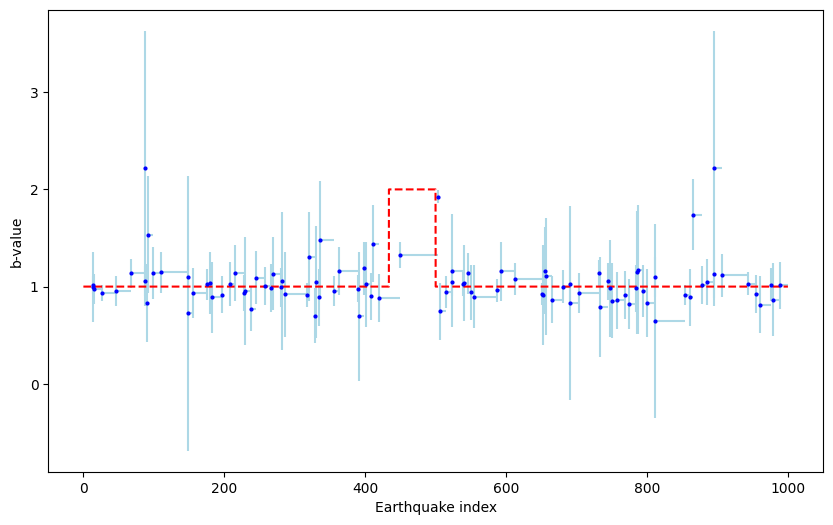

In [52]:
# plot with error bars
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.errorbar(
    times[idx],
    b_series,
    xerr=(
        np.zeros(len(idx)), np.diff(np.append(times[idx], times[-1]))
        ),
    yerr=2* b/np.sqrt(n_bs),
    marker='o',
    markersize=2,
    color='blue',
    linestyle='none',
    ecolor='lightblue',
    )

ax.plot(times, b_true, color='red', linestyle='--', label='true b-value')


ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')

In [53]:
b_series, n_bs, idx = b_samples_pos(mags, times, 100, delta_m=delta_m, cutting='constant_idx', return_idx=True)
idx = idx[1:]-1

Text(0, 0.5, 'b-value')

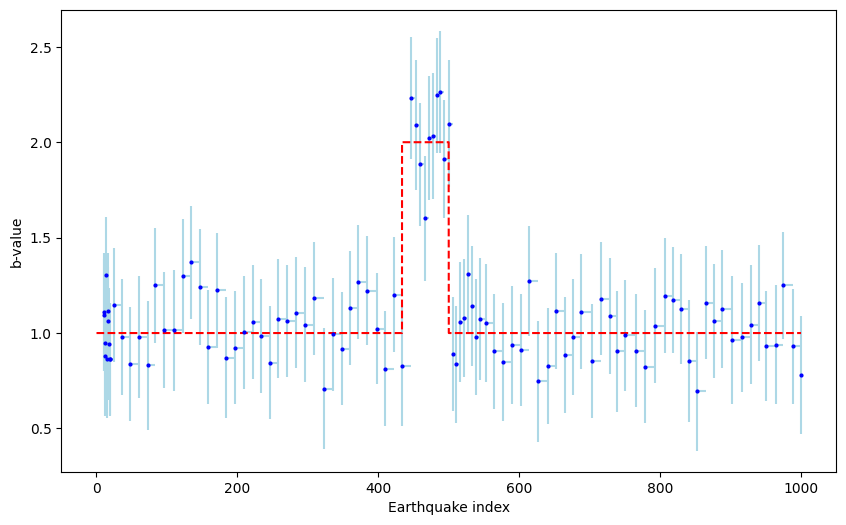

In [54]:
# plot with error bars
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.errorbar(
    times[idx],
    b_series,
    xerr=(
        np.zeros(len(idx)), np.diff(np.append(times[idx], times[-1]))
        ),
    yerr=2* b/np.sqrt(n_bs),
    marker='o',
    markersize=2,
    color='blue',
    linestyle='none',
    ecolor='lightblue',
    )

ax.plot(times, b_true, color='red', linestyle='--', label='true b-value')


ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')

## Utsu test for time series

This conecet of Utsu tests can be applied for b-value series created with b_samples

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from functions.general_functions import simulate_rectangular
from functions.core_functions import utsu_probabilities

In [56]:
n = 20000
n_anomal = 2000
b = 1
delta_b = 0.4
mc = 0
delta_m = 0.1

mags, b_true = simulate_rectangular(n, n_anomal, b, delta_b, mc, delta_m)
times = np.arange(n)

In [57]:
n_b =500
n_sample = np.round(len(mags) / n_b).astype(int)
cutting = 'constant_idx'

utsu_p, b_series, b_std = utsu_probabilities(
    mags,
    times,
    n_sample,
    mc,
    delta_m,
    nb_min=10,
    n=20000,
    transform=False,
    cutting="constant_idx",
    b_method="tinti",
)

/Users/aron/polybox/Projects/b_significant/functions/general_functions.py:65: UserWarning: no value used, therefore variance is not defined
  warnings.warn("no value used, therefore variance is not defined")
/Users/aron/polybox/Projects/b_significant/functions/general_functions.py:59: UserWarning: only one value used, therefore variance is not defined
  warnings.warn(


Text(0, 0.5, 'b-value')

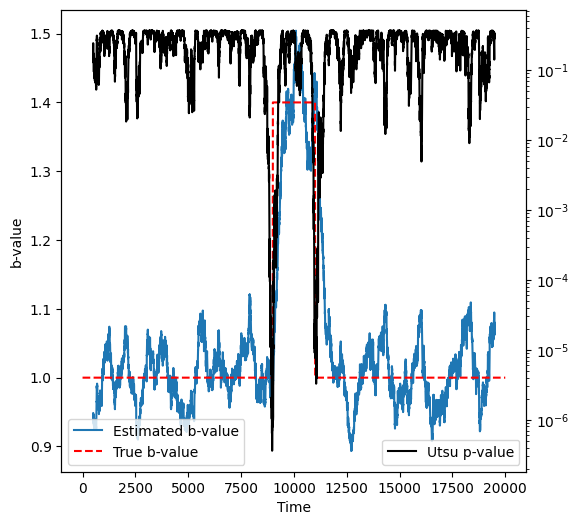

In [58]:
ax = plt.subplots(1, 1, figsize=(6, 6))[1]

ax.plot(times[n_b:], b_series[n_b:], label='Estimated b-value')
#ax.fill_between(times[n_b:], b_series[n_b:] - b_std[n_b:], b_series[n_b:] + b_std[n_b:], alpha=0.3)

ax.plot(times, b_true, color='red', linestyle='--', label='True b-value')
plt.legend(loc='lower left')

# make twin axis 
ax2 = ax.twinx()
ax2.plot(times, utsu_p, color='black', label='Utsu p-value')

# y axis log scale
plt.yscale('log')
plt.legend(loc='lower right')

ax.set_xlabel('Time')
ax.set_ylabel('b-value')


## Autocorrelation

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from functions.core_functions import autocorrelation
from functions.general_functions import simulate_rectangular
import random

Text(0, 0.5, 'Number of earthquakes')

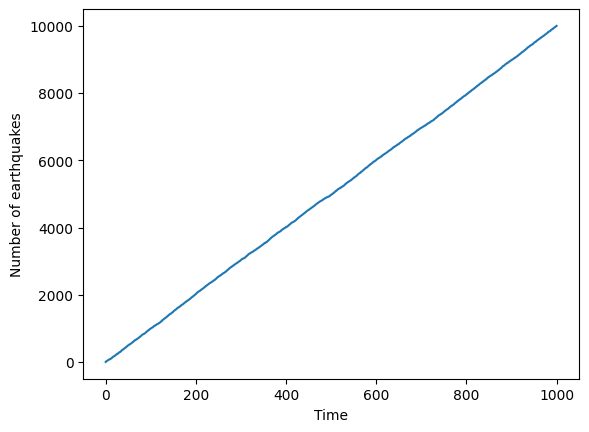

In [60]:
n = 10000
n_anomal = 1000
b = 1
delta_b = 0.3
mc = 0
delta_m = 0.1

mags, b_true = simulate_rectangular(n, n_anomal, b, delta_b, mc, delta_m)
times = np.random.rand(len(mags))*1000
times = np.sort(times)

mags1 = mags[:] + 0
random.shuffle(mags1)

plt.plot(times, np.arange(len(times)))
#label
plt.xlabel('Time')
plt.ylabel('Number of earthquakes')

/Users/aron/polybox/Projects/b_significant/functions/core_functions.py:426: UserWarning: nan encountered in b-series, check what is going on
  warnings.warn(
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/seismostats/analysis/estimate_beta.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  p = 1 + delta_m / np.average(magnitudes - mc, weights=weights)
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/seismostats/analysis/estimate_beta.py:591: RuntimeWarning: invalid value encountered in scalar multiply
  std = 1 / factor * b**2 * std
/Users/aron/polybox/Projects/b_significant/functions/core_functions.py:431: UserWarning: inf encountered in b-series, check what is going on
  warnings.warn(


Text(0, 0.5, 'Probability density')

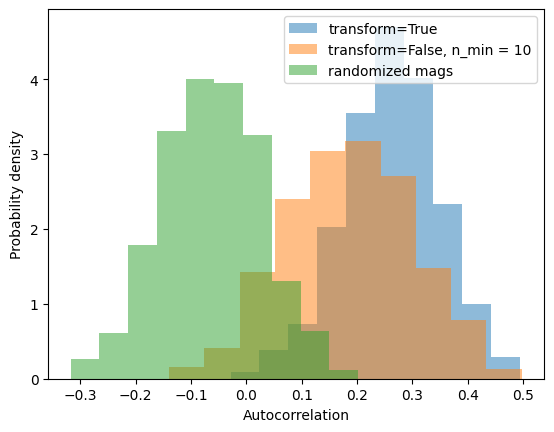

In [61]:
acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m, nb_min=2, n=1000, transform=True, cutting='random_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=True', density=True)

acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=10, n=1000, transform=False, cutting='random_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=False, n_min = 10', density=True)

acfs, n_series_used = autocorrelation(mags1, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=2, n=1000, transform=True, cutting='random_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='randomized mags', density=True)

plt.legend()
plt.xlabel('Autocorrelation')
plt.ylabel('Probability density')

Text(0, 0.5, 'Probability density')

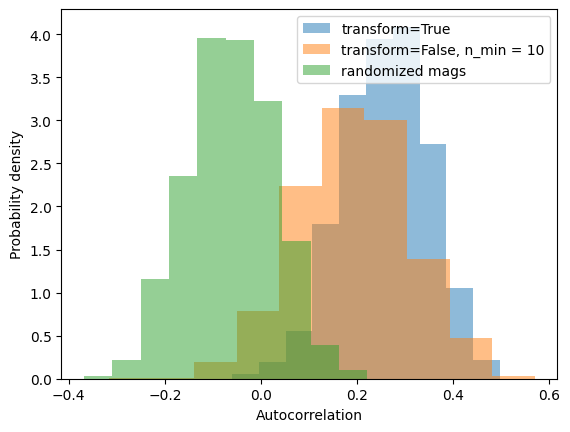

In [62]:
acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m, nb_min=2, n=1000, transform=True, cutting='random', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=True', density=True)

acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=10, n=1000, transform=False, cutting='random', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=False, n_min = 10', density=True)

acfs, n_series_used = autocorrelation(mags1, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=2, n=1000, transform=True, cutting='random', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='randomized mags', density=True)

plt.legend()
plt.xlabel('Autocorrelation')
plt.ylabel('Probability density')

Text(0, 0.5, 'Probability density')

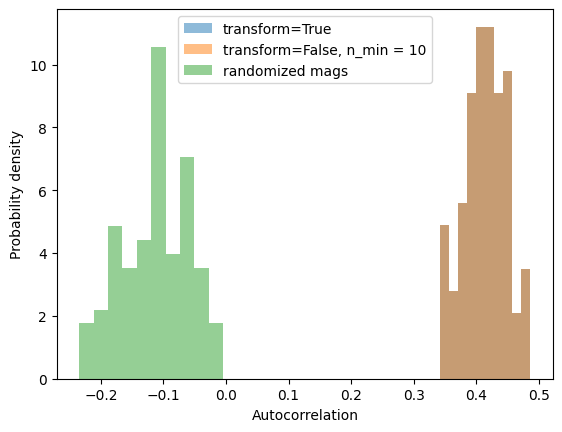

In [63]:
acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m, nb_min=2, n=1000, transform=True, cutting='constant_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=True', density=True)

acfs, n_series_used = autocorrelation(mags, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=10, n=1000, transform=False, cutting='constant_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='transform=False, n_min = 10', density=True)

acfs, n_series_used = autocorrelation(mags1, times, n_sample=100, mc=mc, delta_m=delta_m,  nb_min=2, n=1000, transform=True, cutting='constant_idx', b_method='tinti')
ax  = plt.hist(acfs, alpha=0.5, label='randomized mags', density=True)

plt.legend()
plt.xlabel('Autocorrelation')
plt.ylabel('Probability density')

## Test distribution of Autocorrelation 

Is the distribution of the autocorrelation as we think? hint: yes, and it is essentially the same as the autocorrelation test above.

In [64]:
from functions.core_functions import autocorrelation
from functions.general_functions import simulated_magnitudes_binned
import numpy as np
import matplotlib.pyplot as plt

In [65]:
n = 5000
b = 1
mc = 0
delta_m = 0.1

In [66]:
n_series = np.arange(2, 100)
acf = np.zeros(len(n_series))
acf_std = np.zeros(len(n_series))
n_series_used = np.zeros(len(n_series))

for ii, n_s in enumerate(n_series):
    acf_loop = np.zeros(1000)
    n_series_used_loop = np.zeros(1000)
    for jj in range(1000):
        mags = simulated_magnitudes_binned(n, b, mc, delta_m, b_parameter='b_value')
        acf_loop[jj], n_series_used_loop[jj] = autocorrelation(mags, np.arange(n), n_sample=n_s, mc=mc, delta_m=delta_m, nb_min=2, transform=True, cutting='random_idx', b_method='tinti')
    acf[ii] = np.mean(acf_loop)
    acf_std[ii] = np.std(acf_loop)
    n_series_used[ii] = np.mean(n_series_used_loop)


/Users/aron/polybox/Projects/b_significant/functions/general_functions.py:109: RuntimeWarning: invalid value encountered in scalar divide
  acf /= sum((series - np.mean(series)) ** 2)
/Users/aron/polybox/Projects/b_significant/functions/core_functions.py:441: UserWarning: nan encountered in acf, check what is going on
  warnings.warn("nan encountered in acf, check what is going on")
/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_95678/2061703569.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  acf_loop[jj], n_series_used_loop[jj] = autocorrelation(mags, np.arange(n), n_sample=n_s, mc=mc, delta_m=delta_m, nb_min=2, transform=True, cutting='random_idx', b_method='tinti')


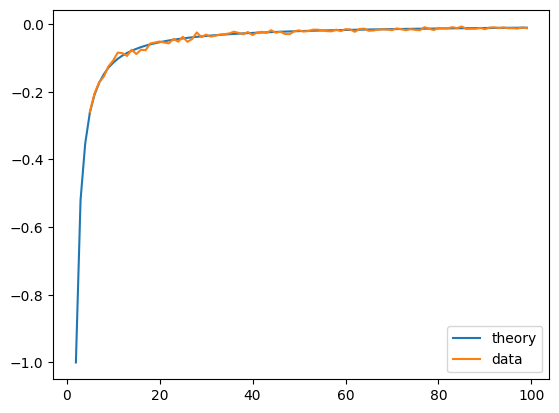

In [67]:
plt.plot(n_series, -1/n_series_used, label ='theory')
plt.plot(n_series, acf, label='data')

plt.legend()

/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_95678/3093657934.py:1: RuntimeWarning: divide by zero encountered in divide
  std_th = (n_series_used-2) / ((n_series_used-1) * np.sqrt(n_series_used))


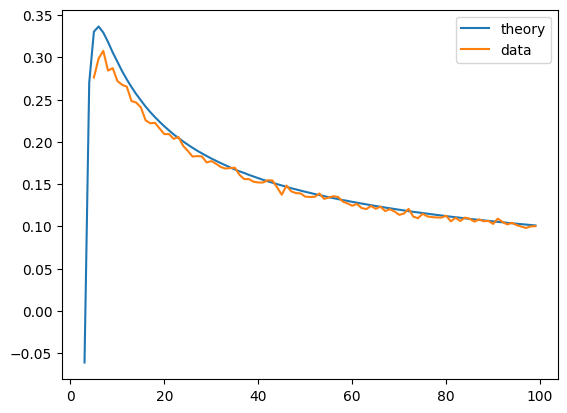

In [68]:
std_th = (n_series_used-2) / ((n_series_used-1) * np.sqrt(n_series_used))

plt.plot(n_series, std_th, label ='theory')
plt.plot(n_series, acf_std, label='data')


plt.legend()

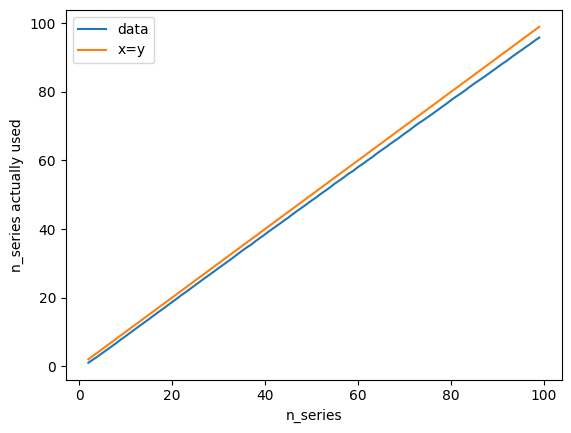

In [69]:
plt.plot(n_series, n_series_used, label='data')
plt.plot(n_series, n_series, label='x=y')

plt.xlabel('n_series')
plt.ylabel('n_series actually used')

plt.legend()

# Mean autocorrelation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions.core_functions import mean_autocorrelation
from functions.general_functions import simulated_magnitudes_binned, simulate_rectangular

In [2]:
n_total = 5000
b = 1
mc = 0
delta_m = 0.1

times = np.random.rand(n_total)*1000
times = np.sort(times)

In [3]:
n_acf = 100

mean_acf1 = np.zeros(n_acf)
std_acf1 = np.zeros(n_acf)
n_series_used1 = np.zeros(n_acf)
mean_acf = np.zeros(n_acf)
std_acf = np.zeros(n_acf)
n_series_used = np.zeros(n_acf)
for ii in range(n_acf):
    mags = simulated_magnitudes_binned(n_total, b, mc, delta_m, b_parameter='b_value')
    mean_acf1[ii], std_acf1[ii], n_series_used1[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='positive')
    mean_acf[ii], std_acf[ii], n_series_used[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='tinti')


/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aron/polybox/Projects/b_significant/functions/core_functions.py:426: UserWarning: nan encountered in b-series, check what is going on
  warnings.warn(
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/seismostats/analysis/estimate_beta.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  p = 1 + delta_m / np.average(magnitudes - mc, weights=weights)
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/seismostats/analysis/estimate_beta.py:146: RuntimeWarning: invalid value encountered in log
  beta = 1 / del

Text(0, 0.5, 'Probability density')

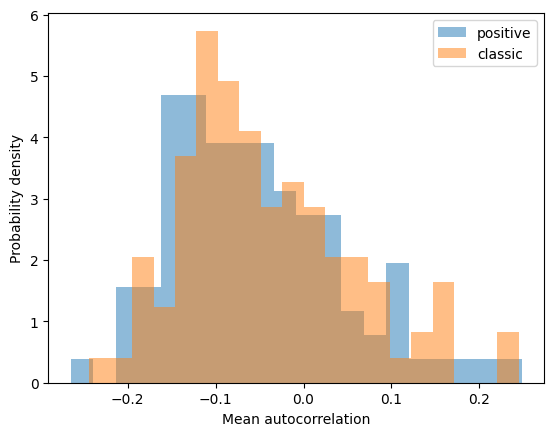

In [79]:
ax  = plt.hist(mean_acf1, alpha=0.5, label='positive', density=True, bins=20)
ax  = plt.hist(mean_acf[:n_acf], alpha=0.5, label='classic', density=True, bins=20)

plt.legend()
plt.xlabel('Mean autocorrelation')
plt.ylabel('Probability density')

In [74]:
n_acf = 500

mean_acf = np.zeros(n_acf)
n_series_used = np.zeros(n_acf)
std_acf = np.zeros(n_acf)
mean_acf_500 = np.zeros(n_acf)
std_acf_500 = np.zeros(n_acf)
n_series_used_500 = np.zeros(n_acf)
for ii in range(n_acf):
    mags = simulated_magnitudes_binned(40000, b, mc, delta_m, b_parameter='b_value')
    mean_acf[ii], std_acf[ii], n_series_used[ii] = mean_autocorrelation(mags, times, n_sample=40, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='tinti')
    mean_acf_500[ii],std_acf_500[ii], n_series_used_500[ii] = mean_autocorrelation(mags, times, n_sample=40, mc=mc, delta_m=delta_m, n=500, transform=True, cutting='random_idx', b_method='tinti')


Text(0, 0.5, 'Probability density')

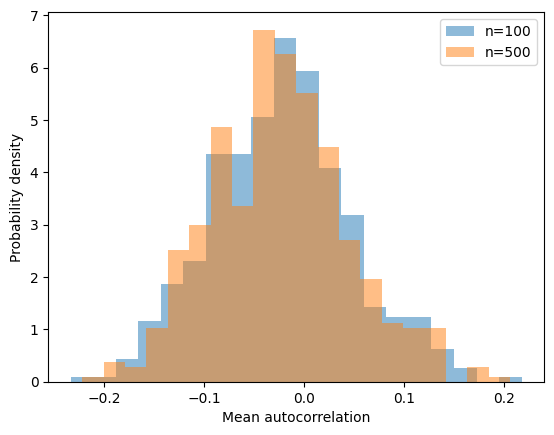

In [75]:
ax  = plt.hist(mean_acf[:n_acf], alpha=0.5, label='n=100', density=True, bins=20)
ax  = plt.hist(mean_acf_500, alpha=0.5, label='n=500', density=True, bins=20)

plt.legend()
plt.xlabel('Mean autocorrelation')
plt.ylabel('Probability density')

In [5]:
n_acf = 500

n_anomal = 1000
delta_b = 0.3

mean_acf1_step = np.zeros(n_acf)
std_acf1_step = np.zeros(n_acf)
n_series_used1_step = np.zeros(n_acf)
mean_acf_step = np.zeros(n_acf)
std_acf_step = np.zeros(n_acf)
n_series_used_step = np.zeros(n_acf)
for ii in range(n_acf):
    mags = simulate_rectangular(n_total, n_anomal, b, delta_b, mc, delta_m)[0]
    mean_acf1_step[ii], std_acf1_step[ii], n_series_used1_step[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='positive')
    mean_acf_step[ii], std_acf_step[ii], n_series_used_step[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='tinti')


/Users/aron/polybox/Projects/b_significant/functions/core_functions.py:426: UserWarning: nan encountered in b-series, check what is going on
  warnings.warn(
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/seismostats/analysis/estimate_beta.py:146: RuntimeWarning: invalid value encountered in log
  beta = 1 / delta_m * np.log(p)
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/aron/polybox/Projects/b_significant/env

Text(0, 0.5, 'Probability density')

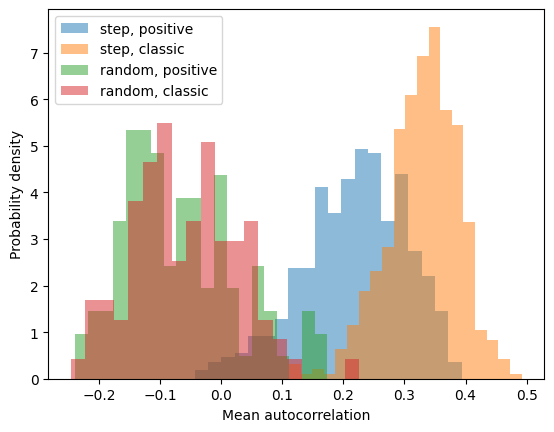

In [6]:
ax  = plt.hist(mean_acf1_step, alpha=0.5, label='step, positive', density=True, bins=20)
ax  = plt.hist(mean_acf_step[:n_acf], alpha=0.5, label='step, classic', density=True, bins=20)
ax  = plt.hist(mean_acf1, alpha=0.5, label='random, positive', density=True, bins=20)
ax  = plt.hist(mean_acf[:n_acf], alpha=0.5, label='random, classic', density=True, bins=20)

plt.legend()
plt.xlabel('Mean autocorrelation')
plt.ylabel('Probability density')

In [9]:
n_acf = 1000

n_anomal = 1000
delta_b = 0.3

mean_acf1_step = np.zeros(n_acf)
std_acf1_step = np.zeros(n_acf)
n_series_used1_step = np.zeros(n_acf)
mean_acf_step = np.zeros(n_acf)
std_acf_step = np.zeros(n_acf)
n_series_used_step = np.zeros(n_acf)

mean_acf1 = np.zeros(n_acf)
std_acf1 = np.zeros(n_acf)
n_series_used1 = np.zeros(n_acf)
mean_acf = np.zeros(n_acf)
std_acf = np.zeros(n_acf)
n_series_used = np.zeros(n_acf)

for ii in range(n_acf):
    mags = simulated_magnitudes_binned(n_total, b, mc, delta_m)
    mean_acf1[ii], std_acf1[ii], n_series_used1[ii],  = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='constant_idx', b_method='tinti')
    mean_acf[ii], std_acf[ii], n_series_used[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='tinti')

    mags_step = simulate_rectangular(n_total, n_anomal, b, delta_b, mc, delta_m)[0]
    mean_acf1_step[ii], std_acf1_step[ii], n_series_used1_step[ii],  = mean_autocorrelation(mags_step, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='constant_idx', b_method='tinti')
    mean_acf_step[ii], std_acf_step[ii], n_series_used_step[ii] = mean_autocorrelation(mags_step, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='tinti')


Text(0, 0.5, 'Probability density')

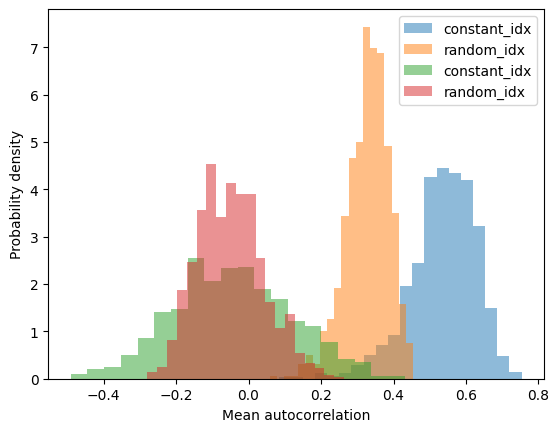

In [10]:
ax  = plt.hist(mean_acf1_step, alpha=0.5, label='constant_idx', density=True, bins=20)
ax  = plt.hist(mean_acf_step[:n_acf], alpha=0.5, label='random_idx', density=True, bins=20)
ax  = plt.hist(mean_acf1, alpha=0.5, label='constant_idx', density=True, bins=20)
ax  = plt.hist(mean_acf[:n_acf], alpha=0.5, label='random_idx', density=True, bins=20)

plt.legend()
plt.xlabel('Mean autocorrelation')
plt.ylabel('Probability density')

In [30]:
n_acf = 500

n_anomal = 1000
delta_b = 0.3

mean_acf1_step = np.zeros(n_acf)
std_acf1_step = np.zeros(n_acf)
n_series_used1_step = np.zeros(n_acf)
mean_acf_step = np.zeros(n_acf)
std_acf_step = np.zeros(n_acf)
n_series_used_step = np.zeros(n_acf)

mean_acf1 = np.zeros(n_acf)
std_acf1 = np.zeros(n_acf)
n_series_used1 = np.zeros(n_acf)
mean_acf = np.zeros(n_acf)
std_acf = np.zeros(n_acf)
n_series_used = np.zeros(n_acf)

for ii in range(n_acf):
    mags = simulated_magnitudes_binned(n_total, b, mc, delta_m)
    mean_acf1[ii], std_acf1[ii], n_series_used1[ii],  = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='tinti')
    mean_acf[ii], std_acf[ii], n_series_used[ii] = mean_autocorrelation(mags, times, n_sample=20, mc=mc, delta_m=delta_m, nb_min=10, n=100, transform=False, cutting='random_idx', b_method='tinti')

    mags_step = simulate_rectangular(n_total, n_anomal, b, delta_b, mc, delta_m)[0]
    mean_acf1_step[ii], std_acf1_step[ii], n_series_used1_step[ii],  = mean_autocorrelation(mags_step, times, n_sample=20, mc=mc, delta_m=delta_m, n=100, transform=True, cutting='random_idx', b_method='tinti')
    mean_acf_step[ii], std_acf_step[ii], n_series_used_step[ii] = mean_autocorrelation(mags_step, times, n_sample=20, mc=mc, delta_m=delta_m, nb_min=10, n=100, transform=False, cutting='random_idx', b_method='tinti')


Text(0, 0.5, 'Probability density')

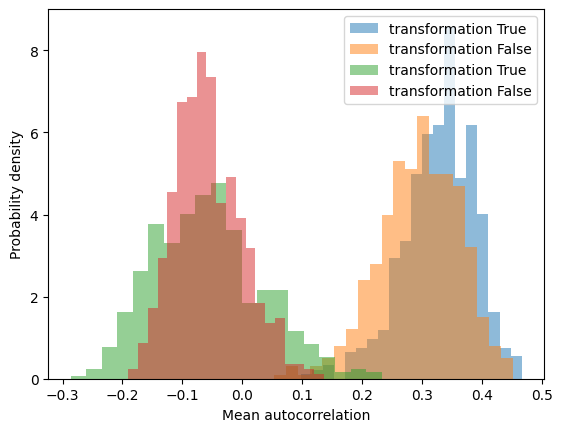

In [31]:
ax  = plt.hist(mean_acf1_step, alpha=0.5, label='transformation True', density=True, bins=20)
ax  = plt.hist(mean_acf_step[:n_acf], alpha=0.5, label='transformation False', density=True, bins=20)
ax  = plt.hist(mean_acf1, alpha=0.5, label='transformation True', density=True, bins=20)
ax  = plt.hist(mean_acf[:n_acf], alpha=0.5, label='transformation False', density=True, bins=20)

plt.legend()
plt.xlabel('Mean autocorrelation')
plt.ylabel('Probability density')

## Get the significance of the MAC

In [3]:
import numpy as np
from functions.eval_functions import pval_mac, zval_mac

In [4]:
mac = np.array([-0.01, -0.1, -0.2, .2])
n_series = np.array([100, 10, 5, 5])
cutting='constant_idx'

pvals = pval_mac(mac, n_series, cutting)
zvals = zval_mac(mac, n_series, cutting)

print('p values: ', pvals)
print('z values: ', zvals)

p values:  [0.5        0.5        0.5        0.04963546]
z values:  [0.         0.         0.         1.64839856]


## MAC vs n_series

In [4]:
from functions.eval_functions import mac_different_n
from functions.general_functions import simulate_sinus
from functions.general_functions import b_any_series

import numpy as np
import matplotlib.pyplot as plt

In [217]:
n = 10000
n_anomal = 500
b = 1
delta_b = 0.2
mc = 0
delta_m = 0.1

mags, b_true = simulate_sinus(n, n_anomal,b, delta_b, mc, delta_m)

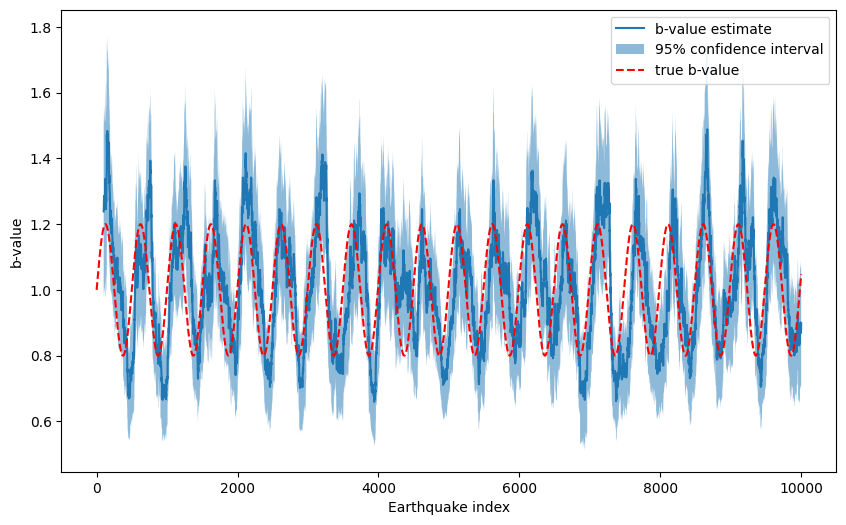

In [6]:
dates = np.arange(len(mags))
b_time, idx_max, b_std = b_any_series(mags, dates, n_b = 100, mc=mc, delta_m=delta_m, return_std=True, overlap=1, method='tinti')

# plot nicely
ax = plt.subplots(figsize=(10,6))[1]
ax.plot(dates[idx_max], b_time, label='b-value estimate')
ax.fill_between(dates[idx_max], b_time-1.96*b_std, b_time+1.96*b_std, alpha=0.5, label='95% confidence interval')
ax.plot(dates, b_true, color='red', linestyle='--', label='true b-value')
ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')
ax.legend()

/Users/aron/polybox/Projects/b_significant/functions/core_functions.py:426: UserWarning: nan encountered in b-series, check what is going on
  warnings.warn(
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/seismostats/analysis/estimate_beta.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  p = 1 + delta_m / np.average(magnitudes - mc, weights=weights)
/Users/aron/polybox/Projects/b_significant/env/lib/python3.11/site-packages/seismostats/analysis/estimate_beta.py:591: RuntimeWarning: invalid value encountered in scalar multiply
  std = 1 / factor * b**2 * std
/Users/aron/polybox/Projects/b_significant/functions/core_functions.py:431: UserWarning: inf encountered in b-series, check what is going on
  warnings.warn(


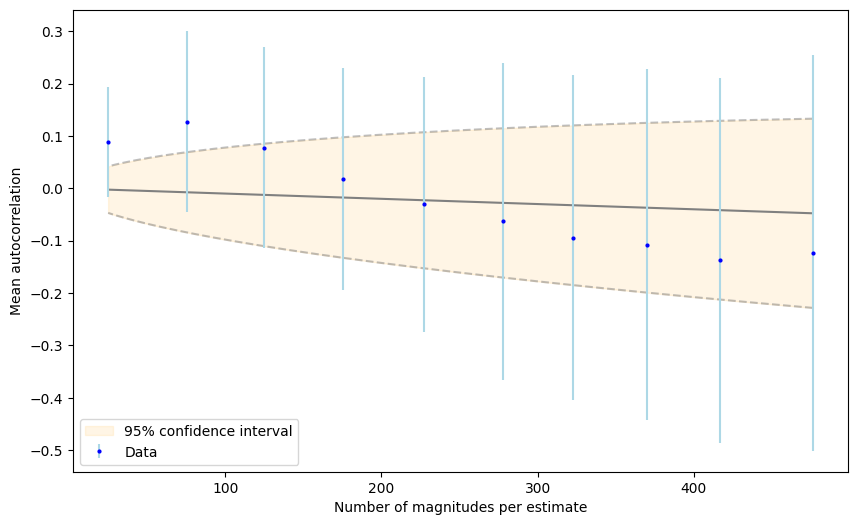

In [7]:
n_bs = np.arange(25, 1000, 50)
acf_mean, acf_std, n_bs, n_series_used = mac_different_n(
    mags,
    np.arange(len(mags)),
    mc,
    delta_m,
    n_bs=n_bs,
    cutting = "random_idx",
    transform = False,
    b_method = "tinti",
)

## Get the "best" lenghtscale

In [804]:
import numpy as np
import matplotlib.pyplot as plt

from functions.general_functions import b_any_series, simulate_rectangular, simulate_randomfield, simulate_sinus, simulate_step, simulate_ramp
from functions.eval_functions import mac_different_n

from seismostats import estimate_b

In [805]:
n = 50000
n_anomal = 500
b = 1
delta_b = 0.1
mc = 0
delta_m = 0.1

mags, b_true = simulate_randomfield(n, n_anomal, b, delta_b, mc, delta_m)
#mags, b_true = simulate_rectangular(n, n_anomal, b, delta_b, mc, delta_m)
#mags, b_true = simulate_sinus(n, n_anomal, b, delta_b, mc, delta_m)
#mags, b_true = simulate_ramp(n, b, delta_b, mc, delta_m)
#mags, b_true = simulate_step(n, b, delta_b, mc, delta_m)

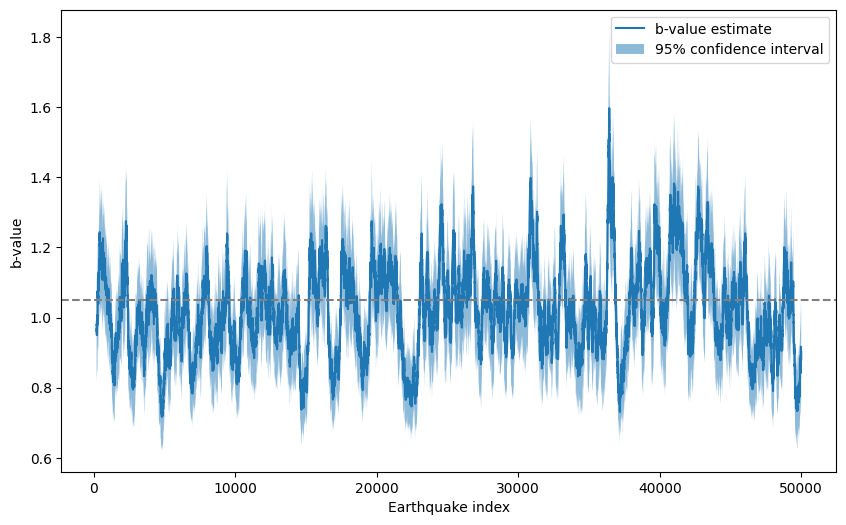

In [806]:
dates = np.arange(len(mags))
b_time, idx_max, b_std = b_any_series(mags, dates, n_b = 200, mc=mc, delta_m=delta_m, return_std=True, overlap=1, method='tinti')

# plot nicely
ax = plt.subplots(figsize=(10,6))[1]
ax.plot(dates[idx_max], b_time, label='b-value estimate')
ax.fill_between(dates[idx_max], b_time-1.96*b_std, b_time+1.96*b_std, alpha=0.5, label='95% confidence interval')
#ax.plot(dates, b_true, color='red', linestyle='--', label='true b-value')
ax.axhline(1.05, color='gray', linestyle='--')
ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')
ax.legend()

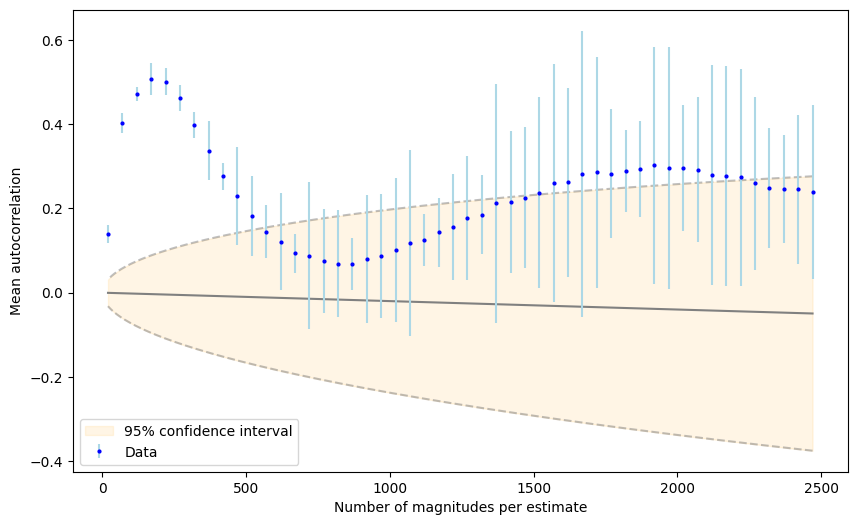

In [807]:
n_bs = np.arange(20, 2500, 50)
acfs, acf_std, n_bs, n_series_used = mac_different_n(
    mags,
    np.arange(len(mags)),
    mc,
    delta_m,
    n_bs=n_bs,
    cutting = 'constant_idx',
    transform = False,
    b_method = "tinti",
    plotting=True,
)

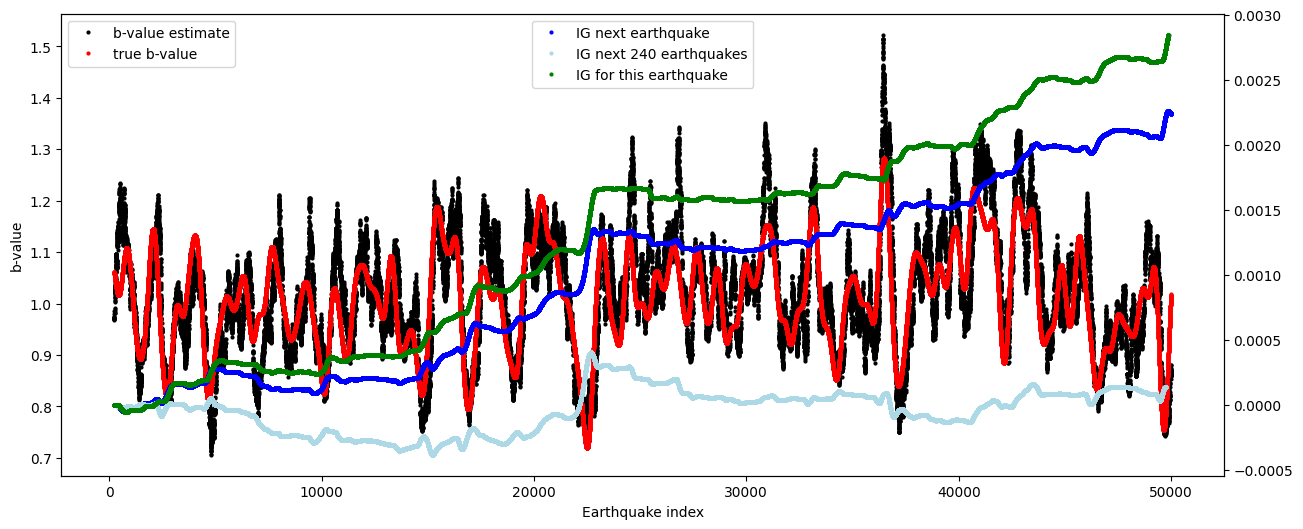

In [838]:
fig, ax = plt.subplots(figsize=(15,6))
 
n_b = 240
# measure how well the signal is reconstructed with the different n_bs
dates = np.arange(len(mags))
b_time, idx_max, b_std = b_any_series(mags, dates, n_b = n_b, mc=mc, delta_m=delta_m, return_std=True, overlap=1, method='tinti')

b_all = estimate_b(mags, mc, delta_m, method='tinti')

# information gain for next earthquake
idx_del = idx_max<len(b_true)-1
idx_max1 = idx_max[idx_del]
inf_gain1 = np.log(b_time[idx_del]/b_all) - (b_time[idx_del]-b_all)/b_true[idx_max1+1]

# information gain for the next nb earthquakes
idx_del = idx_max<len(b_true)-n_b
idx_max2 = idx_max[idx_del]
b_all = estimate_b(mags, mc, delta_m, method='tinti')
inf_gain_nb = np.zeros(len(b_true[idx_max2+1]))
for ii in range(1, n_b):
    inf_gain_nb += np.log(b_time[idx_del]/b_all) - (b_time[idx_del]-b_all)/b_true[idx_max2+ii]
inf_gain_nb = inf_gain_nb/n_b

# information gain for the earthquakes or which this was estimated
half = int(n_b/2)
idx_del = idx_max<len(b_true)-half
idx_max3 = idx_max[idx_del]
b_all = estimate_b(mags, mc, delta_m, method='tinti')
inf_gain_here = np.log(b_time[idx_del]/b_all) - (b_time[idx_del]-b_all)/b_true[idx_max3-half]

ax.plot(dates[idx_max], b_time, 'o', markersize=2, color='k', label='b-value estimate')
ax.plot(dates[idx_max], b_true[idx_max], 'o', markersize=2, color='r', label='true b-value')

# twwin
ax2 = ax.twinx()
ax2.plot(dates[idx_max1], np.cumsum(inf_gain1)/len(inf_gain1), 'o', markersize=2, color='blue', label='IG next earthquake')
ax2.plot(dates[idx_max2], np.cumsum(inf_gain_nb)/len(inf_gain_nb), 'o', markersize=2, color='lightblue', label='IG next '+str(n_b)+' earthquakes')
ax2.plot(dates[idx_max3], np.cumsum(inf_gain_here)/len(inf_gain_here), 'o', markersize=2, color='green', label='IG for this earthquake')

ax.set_xlabel('Earthquake index')
ax.set_ylabel('b-value')
ax.legend(loc='upper left')
ax2.legend(loc='upper center')

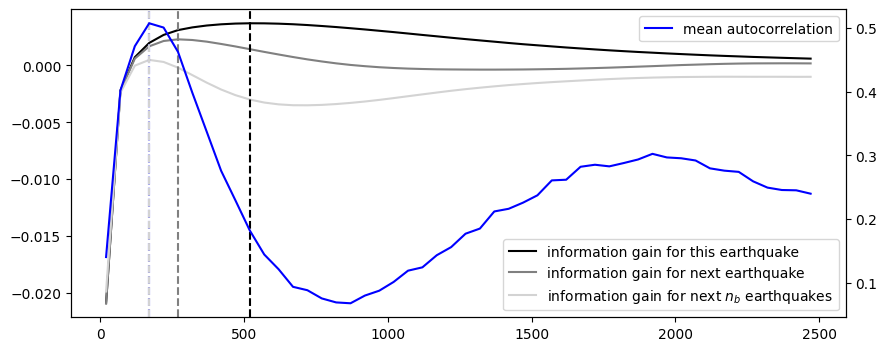

In [850]:
fig, ax = plt.subplots(figsize=(10,4))

diff_sum_here = []
diff_sum_next = []
diff_sum_nb = []
for n_b in n_bs:
    n_b = int(n_b)
    # measure how well the signal is reconstructed with the different n_bs
    dates = np.arange(len(mags))
    b_time, idx_max, b_std = b_any_series(mags, dates, n_b = n_b, mc=mc, delta_m=delta_m, return_std=True, overlap=0.99, method='tinti')
    b_all = estimate_b(mags, mc, delta_m, method='tinti')

    # information gain (assuming that b_all = b)
    half = int(n_b/2)
    inf_gain_here = np.log(b_time/b_all) - (b_time-b_all)/b_true[idx_max-half]
    diff_sum_here.append(sum(inf_gain_here)/len(inf_gain_here))

    idx_del = idx_max<len(b_true)-1
    idx_max1 = idx_max[idx_del]
    inf_gain_next = np.log(b_time[idx_del]/b_all) - (b_time[idx_del]-b_all)/b_true[idx_max1+1]
    diff_sum_next.append(sum(inf_gain_next)/len(inf_gain_next))
    
    idx_del = idx_max<len(b_true)-n_b
    idx_max2 = idx_max[idx_del]
    inf_gain = np.zeros(len(b_time[idx_del]))
    for ii in range(1, n_b):
        inf_gain += np.log(b_time[idx_del]/b_all) - (b_time[idx_del]-b_all)/b_true[idx_max2+ii]
    inf_gain = inf_gain/n_b
    diff_sum_nb.append(sum(inf_gain)/len(inf_gain))

ax.plot(n_bs, diff_sum_here, label='information gain for this earthquake', color='black')
ax.plot(n_bs, diff_sum_next, label='information gain for next earthquake', color='grey')
ax.plot(n_bs, diff_sum_nb, label='information gain for next $n_b$ earthquakes', color='lightgrey')

# twin ax
ax2 = plt.gca().twinx()
ax2.plot(n_bs, acfs, color='blue', label='mean autocorrelation')
n_max = n_bs[np.argmax(acfs)]
ax.axvline(n_max, color='blue', linestyle='--')
n_max = n_bs[np.argmax(diff_sum_here)]
ax.axvline(n_max, color='black', linestyle='--')
n_max = n_bs[np.argmax(diff_sum_next)]
ax.axvline(n_max, color='grey', linestyle='--')
n_max = n_bs[np.argmax(diff_sum_nb)]
ax.axvline(n_max, color='lightgrey', linestyle='--')

ax.legend(loc='lower right')
ax2.legend(loc='upper right')

### Synthetic MAC: faster estimation without actual magnitudes

In [2]:
from functions.general_functions import b_any_series, simulate_rectangular, simulate_randomfield, simulate_sinus, simulate_step, simulate_ramp
import numpy as np
import matplotlib.pyplot as plt
from functions.general_functions import acf_lag_n
from functions.eval_functions import mu_sigma_mac


In [3]:
n_total = 50000
n_anomal = 1000
mc = 0
delta_m = 0.1

perc_change = 0.1
b= 1
delta_b = b*perc_change

mags, b_true = simulate_randomfield(n_total, n_anomal, b, delta_b, mc, delta_m)
# mags, b_true = simulate_rectangular(n_total, n_anomal, b, delta_b, mc, delta_m)
# mags, b_true = simulate_sinus(n_total, n_anomal, b, delta_b, mc, delta_m)

shifts = np.arange(20, 4000, 50)
acf = np.zeros(len(shifts))
inf_gain = np.zeros(len(shifts))
inf_gain1 = np.zeros(len(shifts))
inf_gain0 = np.zeros(len(shifts))
for ii, shift in enumerate(shifts):
    b_expected = np.convolve(b_true, np.ones(shift)/shift, mode='valid')
    b_noisy= np.random.normal(loc=b_expected,scale=b_expected/np.sqrt(shift))
    acf[ii] += acf_lag_n(b_noisy, shift)
    # information gain
    b_all = np.mean(b_noisy)
    half = int(shift/2)
    inf_gain0[ii] = np.mean(
        np.log(b_noisy/b_all) - (b_noisy-b_all)/b_true[half:-half+1]
        )
    inf_gain1[ii] = np.mean(
        np.log(b_noisy[:-2]/b_all) - (b_noisy[:-2]-b_all)/b_true[shift+1:]
        )
    inf_gain[ii] = np.mean(
        np.log(b_noisy[:-shift-1]/b_all) - (b_noisy[:-shift-1]-b_all)/b_expected[shift+1:]
        )
    

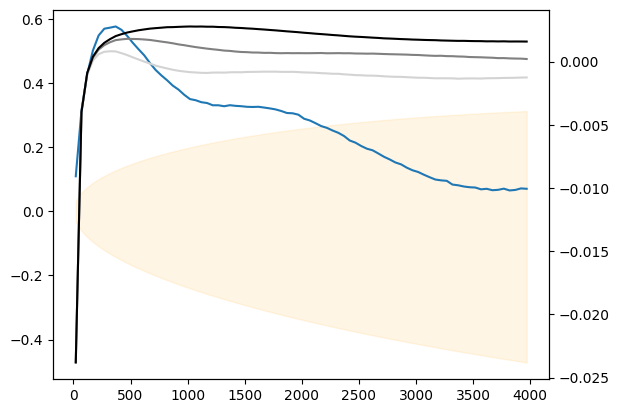

In [5]:
cutting = 'constant_idx'

plt.plot(shifts, acf)
n_bs = shifts

# Plot 0.05 threshold
x = np.arange(n_total/max(n_bs), n_total/min(n_bs) + 1, 1)
mu, sigma = mu_sigma_mac(x, cutting)
plt.fill_between(
    n_total / x,
    1.96 * sigma - 1 / x,
    -1.96 * sigma - 1 / x,
    color="orange",
    alpha=0.1,
    label="95% confidence interval",
)


# twin ax
ax2 = plt.gca().twinx()
ax2.plot(shifts, inf_gain, color='lightgrey')
ax2.plot(shifts, inf_gain1, color='grey')
ax2.plot(shifts, inf_gain0, color='black')

# log axis
#plt.yscale('log')

## KS test